<h1><center>Task 4 : Analysis Required</center></h1>

In [1]:
import gensim.downloader as api
import numpy as np
import spacy
import random
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

<h4>Load Pretrained Word2Vec Model</h4>

In [2]:
print("Loading Pretrained Word2Vec Model...")
pretrained_model = api.load("word2vec-google-news-300")
print("Pretrained Model Loaded Successfully!")

Loading Pretrained Word2Vec Model...
Pretrained Model Loaded Successfully!


<h4>Load SpaCy's small English model for filtering meaningful words</h4>

In [3]:
nlp = spacy.load("en_core_web_sm")

<h4>Define analogies</h4>

In [9]:
analogies = [
    ("king", "man", "woman"),
    ("doctor", "man", "woman"),
    ("france", "spain", "madrid"),
    ("florida", "texas", "austin")  
]

<h4>Function to compute word analogy using Word2Vec</h4>

In [10]:
def compute_analogy(word1, word2, word3, model):
    """Computes analogy: word1 - word2 + word3 ≈ ?"""
    try:
        result = model.most_similar(positive=[word1, word3], negative=[word2], topn=1)
        return result[0][0]  # Return top most similar word
    except KeyError as e:
        print(f"Word not found in vocabulary: {e}")
        return None


<h4>Function to remove duplicate words from the list</h4>

In [11]:
def remove_duplicates(words):
    return list(set(words))

<h4>Function to filter meaningful words using SpaCy</h4>

In [12]:
def filter_meaningful_words(word_list):
    return [word for word in word_list if word in pretrained_model and nlp(word)[0].is_alpha]

<h4>Function to create and plot t-SNE visualization for word analogies</h4>

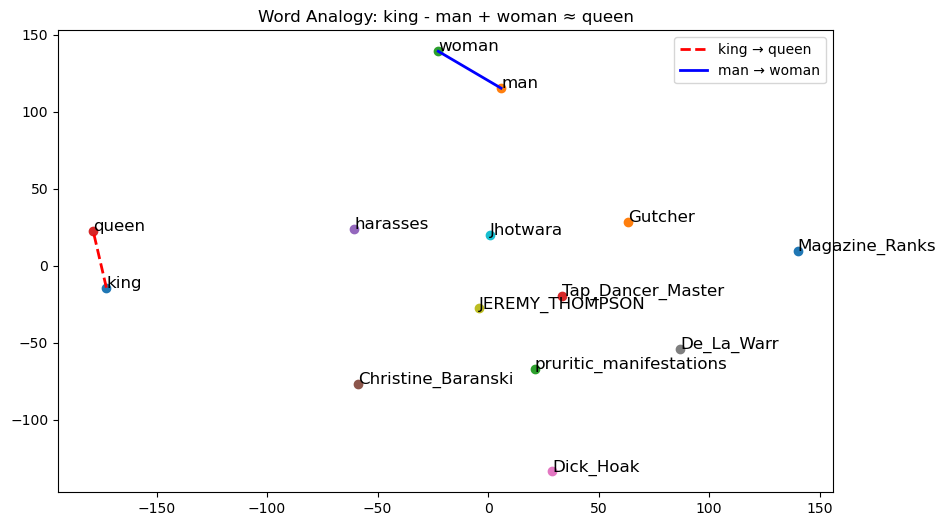

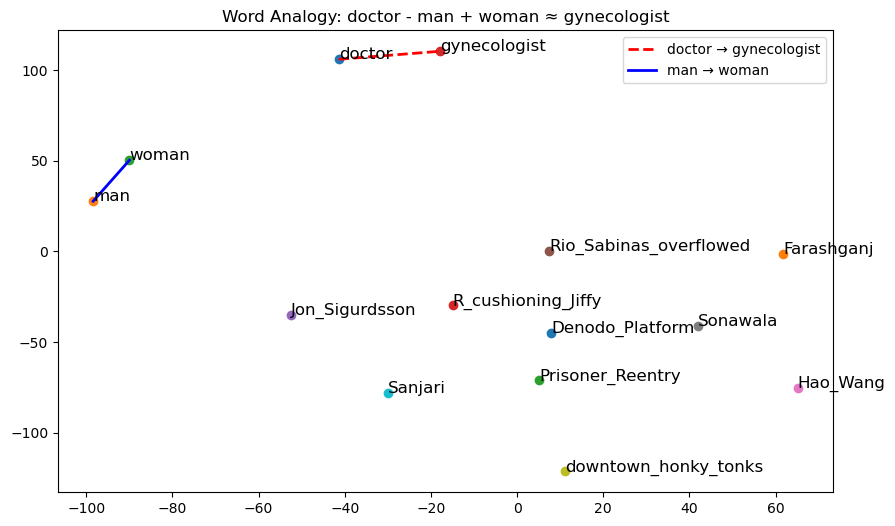

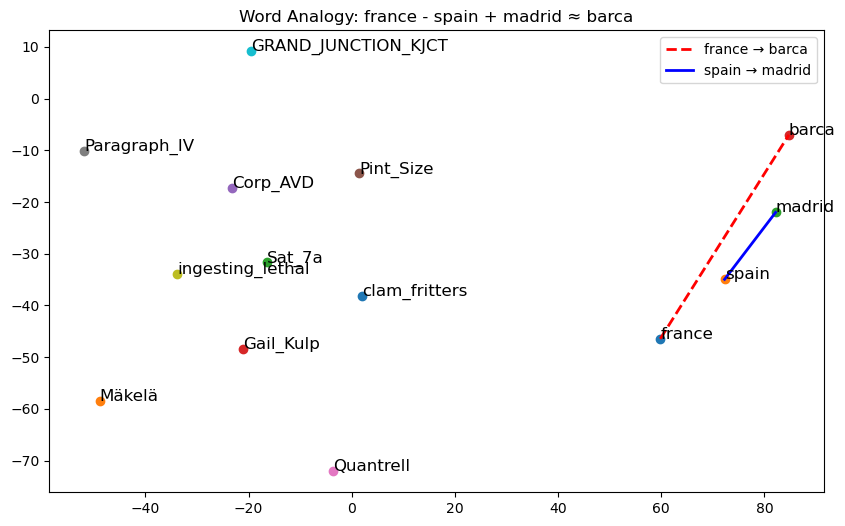

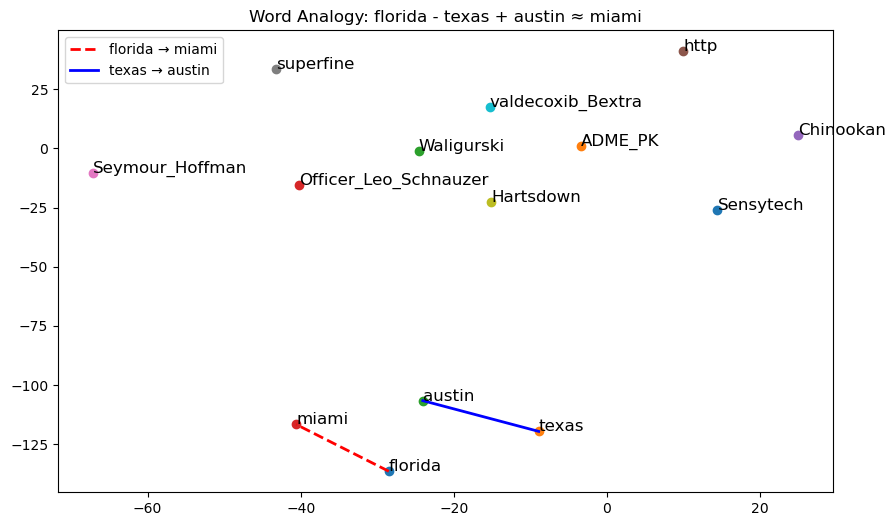

In [13]:
def plot_tsne_analogies(analogies, model):
    for word1, word2, word3 in analogies:
        words_to_plot = [word1, word2, word3]
        word_vectors = [model[word] for word in words_to_plot]

        word4 = compute_analogy(word1, word2, word3, model)
        if word4:
            words_to_plot.append(word4)
            word_vectors.append(model[word4])

        # Add 10 random words from vocabulary
        random_words = random.sample(list(model.index_to_key), 10)
        words_to_plot.extend(random_words)
        word_vectors.extend([model[word] for word in random_words])

        # Convert to NumPy array and apply t-SNE
        word_vectors = np.array(word_vectors)
        tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(word_vectors) - 1))
        reduced_vectors = tsne.fit_transform(word_vectors)

        # Plot words
        plt.figure(figsize=(10, 6))
        for i, word in enumerate(words_to_plot):
            plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], marker='o')
            plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=12)

        # Draw analogy lines
        idx1, idx2, idx3, idx4 = [words_to_plot.index(w) for w in [word1, word2, word3, word4]]
        plt.plot([reduced_vectors[idx1, 0], reduced_vectors[idx4, 0]],
                 [reduced_vectors[idx1, 1], reduced_vectors[idx4, 1]], 'r--', linewidth=2, label=f"{word1} → {word4}")
        plt.plot([reduced_vectors[idx2, 0], reduced_vectors[idx3, 0]],
                 [reduced_vectors[idx2, 1], reduced_vectors[idx3, 1]], 'b-', linewidth=2, label=f"{word2} → {word3}")

        plt.legend()
        plt.title(f"Word Analogy: {word1} - {word2} + {word3} ≈ {word4}")
        plt.show()

# Run the t-SNE visualization
plot_tsne_analogies(analogies, pretrained_model)